***Project EV Population Forecasting Analysis***

In [ ]:
# Importing Libraries

import pandas as pd
import numpy as py
import math

****Data Cleaning and Preparation**

In [ ]:
# reading file from external directory

df_ev = pd.read_csv("Electric_Vehicle_Population_Data_Excel_sheet .csv")

In [ ]:
# reading the dataset
df_ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [ ]:
# Checking the data description
df_ev.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [ ]:
# checking the Null Values
df_ev.isnull().sum() 


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [ ]:
# Handling Null Values or treating Missing Values

for i in df_ev.columns:
    if df_ev[i].dtypes=='object':
        m=df_ev[i].mode()[0]
        df_ev[i]=df_ev[i].fillna(m)
    else:
        me=df_ev[i].mean()
        df_ev[i]=df_ev[i].fillna(me)

In [ ]:
df_ev.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [ ]:
df_ev['Model Year'].value_counts()

Model Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1998        1
1997        1
2003        1
Name: count, dtype: int64

Descriptive Analysis:
1. Calculate summary statistics (mean, median, standard deviation) for numerical variables like Electric Range and Base MSRP.
2. Provide visualizations (e.g., histograms, box plots) to understand data distributions.

In [ ]:
# Calculate summary statistics (mean, median, standard deviation) for numerical variables like Electric Range and Base MSRP.
M=df_ev[['Electric Range','Base MSRP']].mean()
print("Mean of Electric Range and Base MSRP:\n", M)

Md=df_ev[['Electric Range','Base MSRP']].median()
print("Median of Electric Range and Base MSRP:\n", Md)

Sd=df_ev[['Electric Range','Base MSRP']].std()
print("Standard Deviation of Electric Range and Base MSRP:\n", Sd)

Mean of Electric Range and Base MSRP:
 Electric Range      58.842162
Base MSRP         1073.109363
dtype: float64
Median of Electric Range and Base MSRP:
 Electric Range    0.0
Base MSRP         0.0
dtype: float64
Standard Deviation of Electric Range and Base MSRP:
 Electric Range      91.981298
Base MSRP         8358.624956
dtype: float64


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

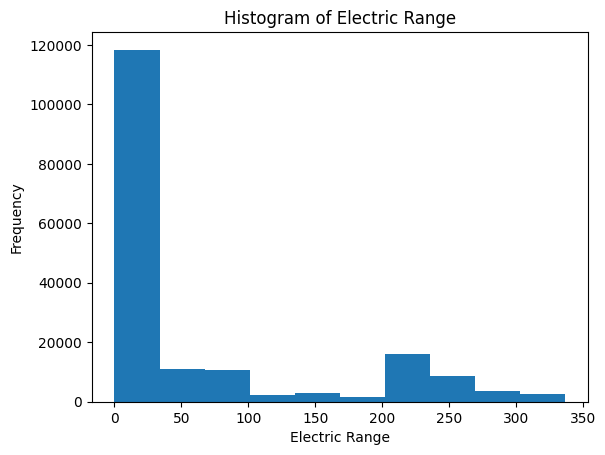

In [ ]:
# Provide visualizations (e.g., histograms, box plots) to understand data distributions.

# Histogram for Electric Range
df_ev['Electric Range'].plot(kind='hist')
plt.title('Histogram of Electric Range')
plt.xlabel('Electric Range')
plt.text.show()
plt.show()

****3.Time-Series Analysis:****
1. Explore trends in EV registrations by model year.
2. Create line charts and time-series plots to visualize growth trends over time.

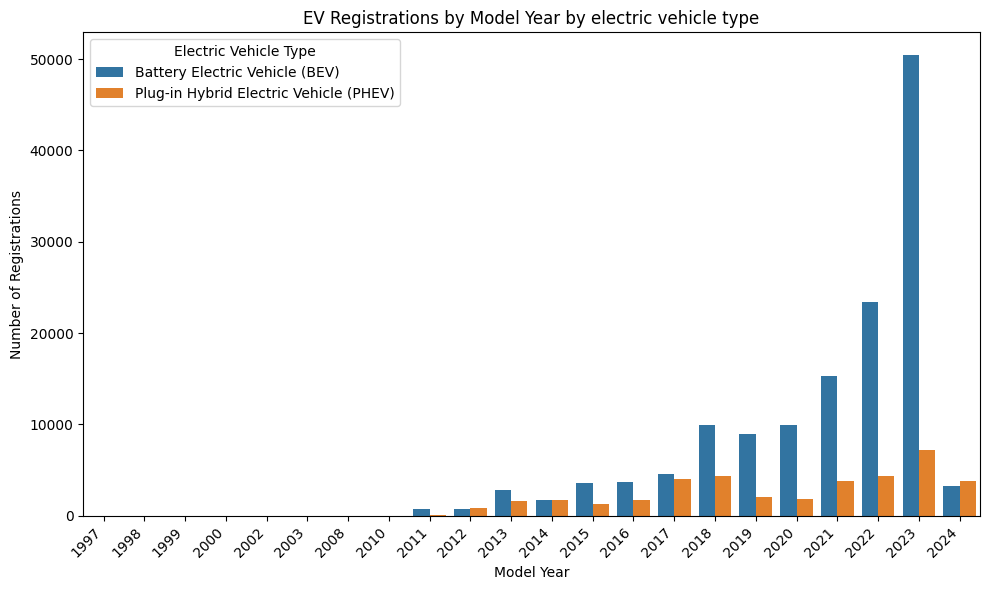

In [ ]:
#Explore trends in EV registrations by model year.

plt.figure(figsize=(10,6))
sns.countplot(x='Model Year', data=df_ev,hue='Electric Vehicle Type')
plt.scatter(x='Model Year', y='Electric Vehicle Type', data=df_ev)
plt.title('EV Registrations by Model Year by electric vehicle type')
plt.xlabel('Model Year')
plt.ylabel('Number of Registrations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Average Electric Range Over Model Years')

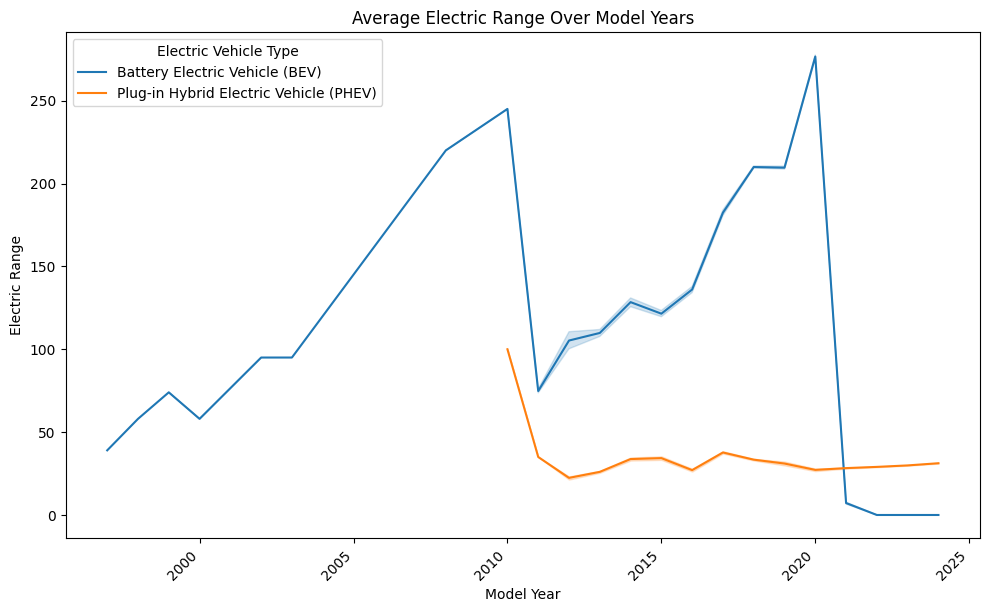

In [76]:
# Create line charts and time-series plots to visualize growth trends over time.
plt.figure(figsize=(10,6))
sns.lineplot(x='Model Year', y='Electric Range', data=df_ev,hue='Electric Vehicle Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.title('Average Electric Range Over Model Years')

***Geographical Analysis:***
1. Generate heatmaps to visualize EV registrations by county and city. 
2. Perform clustering analysis to identify hotspots of EV 
adoption. 

In [77]:
df_ev[['County', 'City']].value_counts()

County        City        
King          Seattle         29452
              Bellevue         8930
              Redmond          6478
Clark         Vancouver        6193
King          Kirkland         5362
                              ...  
Pierce        Kapowsin            1
Philadelphia  Philadelphia        1
Parker        Weatherford         1
Pierce        Home                1
Alameda       Alameda             1
Name: count, Length: 783, dtype: int64

In [78]:
# Generate heatmaps to visualize EV registrations by county and city.
# Cross Tab & Heatmap
ev_ct=pd.crosstab(df_ev['County'],df_ev['City'])

In [ ]:
#sns.heatmap(ev_ct,annot=True)

<Axes: xlabel='City', ylabel='County'>

****Segmentation Analysis:***
1. Breakdown registrations by Make, Model, and Electric Vehicle Type to identify patterns. 
2. Analyze the distribution of Clean Alternative Fuel Vehicle (CAFV) Eligibility.

In [ ]:
# Breakdown registrations by Make, Model, and Electric Vehicle Type to identify patterns. 
make_counts = df_ev[['Make','Model','Electric Vehicle Type']].value_counts()
print("EV Registrations by Make:\n", make_counts)


EV Registrations by Make:
 Make         Model        Electric Vehicle Type                 
TESLA        MODEL Y      Battery Electric Vehicle (BEV)            35989
             MODEL 3      Battery Electric Vehicle (BEV)            30092
NISSAN       LEAF         Battery Electric Vehicle (BEV)            13366
TESLA        MODEL S      Battery Electric Vehicle (BEV)             7735
CHEVROLET    BOLT EV      Battery Electric Vehicle (BEV)             6821
                                                                    ...  
BMW          745LE        Plug-in Hybrid Electric Vehicle (PHEV)        2
BENTLEY      BENTAYGA     Plug-in Hybrid Electric Vehicle (PHEV)        1
CHEVROLET    S-10 PICKUP  Battery Electric Vehicle (BEV)                1
PORSCHE      918          Plug-in Hybrid Electric Vehicle (PHEV)        1
ROLLS ROYCE  SPECTRE      Battery Electric Vehicle (BEV)                1
Name: count, Length: 142, dtype: int64


In [ ]:
sns.countplot(x='Make', data=df_ev,hue=[['Electric Vehicle Type','Model']])
plt.xticks(rotation=90, ha='right')
plt.tight_layout()